<a href="https://colab.research.google.com/github/Yuvraj2409/BE-PROJECT/blob/master/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
pip install virtualenv

     |████████████████████████████████| 4.6MB 701kB/s 
     |████████████████████████████████| 573kB 58.7MB/s 
  Created wheel for distlib: filename=distlib-0.3.0-cp36-none-any.whl size=340429 sha256=73298d4768165ccf3d2329e75873c79218155e57ca23a333663a2238557f0a5e
  Stored in directory: /root/.cache/pip/wheels/6e/e8/db/c73dae4867666e89ba3cfbc4b5c092446f0e584eda6f409cbb
Successfully built distlib


In [0]:
mkdir license-plate-recognition

In [0]:
cd license-plate-recognition

/content/license-plate-recognition


In [0]:
!virtualenv lpr

created virtual environment CPython3.6.9.final.0-64 in 450ms
  creator CPython3Posix(dest=/content/license-plate-recognition/lpr, clear=False, global=False)
  seeder FromAppData(download=False, pip=latest, setuptools=latest, wheel=latest, via=copy, app_data_dir=/root/.local/share/virtualenv/seed-v1)
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator


In [0]:
!source lpr/bin/activate

In [0]:
pip install scikit-image

In [0]:
cp /content/drive/My\ Drive/car.jpg ./

In [0]:
pip install numpy scipy matplotlib Pillow

(548, 700)


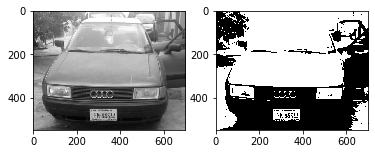

In [0]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

car_image = imread("car.jpg", as_gray=True)

print(car_image.shape)


gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
ax2.imshow(binary_car_image, cmap="gray")
plt.show()

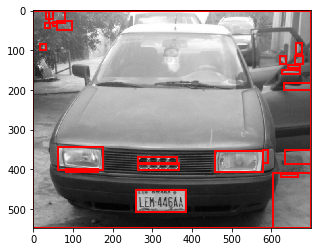

In [0]:
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches


label_image = measure.label(binary_car_image)
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray");

for region in regionprops(label_image):
    if region.area < 50:
        continue

    minRow, minCol, maxRow, maxCol = region.bbox
    rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
    ax1.add_patch(rectBorder)

#plt.show()

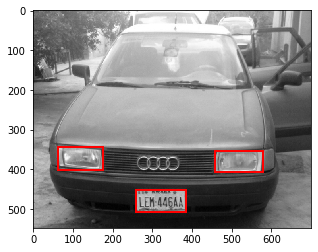

In [0]:

from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

label_image = measure.label(binary_car_image)

plate_dimensions = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
min_height, max_height, min_width, max_width = plate_dimensions
plate_objects_cordinates = []
plate_like_objects = []
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray");

for region in regionprops(label_image):
    if region.area < 50:
        continue

    min_row, min_col, max_row, max_col = region.bbox
    region_height = max_row - min_row
    region_width = max_col - min_col
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
        plate_like_objects.append(binary_car_image[min_row:max_row,
                                  min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col,
                                              max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col-min_col, max_row-min_row, edgecolor="red", linewidth=2, fill=False)
        ax1.add_patch(rectBorder)

plt.show()

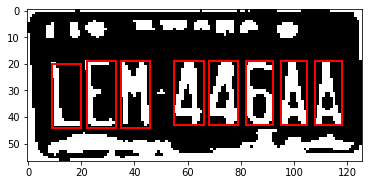

In [0]:

import numpy as np
from skimage.transform import resize
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as pltx can be either a single Axes object or an array of Axes objects if more than one subplot was created. The dimensions of the resulting a

license_plate = np.invert(plate_like_objects[2])

labelled_plate = measure.label(license_plate)

fig, ax1 = plt.subplots(1)
ax1.imshow(license_plate, cmap="gray")

character_dimensions = (0.35*license_plate.shape[0], 0.60*license_plate.shape[0], 0.05*license_plate.shape[1], 0.15*license_plate.shape[1])
min_height, max_height, min_width, max_width = character_dimensions

characters = []
counter=0
column_list = []
for regions in regionprops(labelled_plate):
    y0, x0, y1, x1 = regions.bbox
    region_height = y1 - y0
    region_width = x1 - x0

    if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
        roi = license_plate[y0:y1, x0:x1]

        rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rect_border)

        resized_char = resize(roi, (20, 20))
        characters.append(resized_char)

        column_list.append(x0)

plt.show()

In [0]:
pip install scikit-learn

In [0]:
cp -r /content/drive/My\ Drive/train /usr/local/lib/python3.6/dist-packages/

In [0]:
import os
import sys
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from skimage.io import imread
from skimage.filters import threshold_otsu

letters = [
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
            'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z'
        ]

def read_training_data(training_directory):
    image_data = []
    target_data = []
    for each_letter in letters:
        for each in range(10):
            image_path = os.path.join(training_directory, each_letter, each_letter + '_' + str(each) + '.jpg')
            img_details = imread(image_path, as_gray=True)
            
            binary_image = img_details < threshold_otsu(img_details)
           
            flat_bin_image = binary_image.reshape(-1)
            image_data.append(flat_bin_image)
            target_data.append(each_letter)

    return (np.array(image_data), np.array(target_data))

def cross_validation(model, num_of_fold, train_data, train_label):
    accuracy_result = cross_val_score(model, train_data, train_label,
                                      cv=num_of_fold)
    print("Cross Validation Result for ", str(num_of_fold), " -fold")

    print(accuracy_result * 100)


current_dir = os.path.dirname(os.path.abspath(sys.argv[0]))

training_dataset_dir = os.path.join(current_dir, 'train')

image_data, target_data = read_training_data(training_dataset_dir)

svc_model = SVC(kernel='linear', probability=True)

cross_validation(svc_model, 4, image_data, target_data)


svc_model.fit(image_data, target_data)

save_directory = os.path.join(current_dir, 'models/svc/')
if not os.path.exists(save_directory):
    os.makedirs(save_directory)
joblib.dump(svc_model, save_directory+'/svc.pkl')


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Cross Validation Result for  4  -fold
[ 96.47058824 100.          95.29411765  98.82352941]


['/usr/local/lib/python3.6/dist-packages/models/svc//svc.pkl']

In [0]:
import os

from sklearn.externals import joblib

current_dir = os.path.dirname(os.path.abspath(sys.argv[0]))
model_dir = os.path.join(current_dir, 'models/svc/svc.pkl')
model = joblib.load(model_dir)

classification_result = []
for each_character in characters:

    each_character = each_character.reshape(1, -1);
    result = model.predict(each_character)
    classification_result.append(result)

print(classification_result)

plate_string = ''
for eachPredict in classification_result:
    plate_string += eachPredict[0]

print(plate_string)

column_list_copy = column_list[:]
column_list.sort()
rightplate_string = ''
for each in column_list:
    rightplate_string += plate_string[column_list_copy.index(each)]

print(rightplate_string)

[array(['L'], dtype='<U1'), array(['M'], dtype='<U1'), array(['4'], dtype='<U1'), array(['4'], dtype='<U1'), array(['6'], dtype='<U1'), array(['A'], dtype='<U1'), array(['A'], dtype='<U1'), array(['L'], dtype='<U1')]
LM446AAL
LLM446AA
